In [1]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
country_data_df.head(1)

Total_MSW = country_data_df[['country_name', 
                       'income_id', 
                       'gdp', 
                       'population_population_number_of_people', 
                       'total_msw_total_msw_generated_tons_year']]
Total_MSW.fillna(0).set_index('country_name').head(5)

,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
country_name,,,,
Aruba,HIC,0.000000e+00,103187.0,8.813202e+04
Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06
Angola,LMC,1.030423e+11,25096150.0,4.213644e+06
Albania,UMC,1.347108e+10,2880703.0,1.142964e+06
Andorra,HIC,3.319880e+09,82431.0,4.300000e+04


In [3]:
# rate of MSW generation per day = total_msw_total_msw_generated_tons_year / 365

#MSW['rate_per_day_kgs'] = MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]
Total_MSW.head(1)

#Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person'].rank(ascending = True)
Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person']
Total_MSW.head(3)

<ipython-input-3-9dc8b566fa97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
<ipython-input-3-9dc8b566fa97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]
<ipython-input-3-9dc8b566fa97>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
0,Aruba,HIC,NaN,103187.0,8.813202e+04,241.457580,0.854100,0.854100
1,Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06,15420.617452,0.162411,0.162411
2,Angola,LMC,1.030423e+11,25096150.0,4.213644e+06,11544.229000,0.167900,0.167900


In [63]:
North_Asia = Total_MSW.loc[country_data_df['country_name'].isin(['Russia', 'Siberia'])].set_index('country_name')

West_Asia = Total_MSW.loc[country_data_df['country_name'] .\
            isin(['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia','Iran', 'Iraq', 'Israel', 
                  'Jordan','Kuwait', 'Lebanon', 'Omar', 'Qatar', 'Saudi Arabia', 'State of Palestine', 
                  'Turkey', 'United Arab Emirates', 'Yemen'])].set_index('country_name')

Central_Asia = Total_MSW.loc[country_data_df['country_name'] .\
            isin(['Afghanistan', 'Khazakstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 
                    'Uzbekistan'])].set_index('country_name')

East_Asia = Total_MSW.loc[country_data_df['country_name'] .\
            isin(['China', 'Hong Kong SAR, China', 'Macao SAR, China', 'Japan', 'Korea(North)', 'Korea(South)',
                 'Mongolia', 'Taiwan', 'Korea, Rep.'])].set_index('country_name')


South_Asia = Total_MSW.loc[country_data_df['country_name'] .\
            isin(['Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Srilanka'])].set_index('country_name')

Southeast_Asia = Total_MSW.loc[country_data_df['country_name'] .\
            isin(['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Phillipiness',
                  'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'])].set_index('country_name')
Southeast_Asia


Asia = [North_Asia, West_Asia, Central_Asia, East_Asia, South_Asia, Southeast_Asia]
df_Asia = pd.concat(Asia)
df_Asia.drop('default_rank', axis=1)

,index,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person
country_name,,,,,,,
United Arab Emirates,5,HIC,3.842225e+11,9.269612e+06,5.413453e+06,14831.379200,0.584000
Armenia,7,UMC,1.150200e+10,2.906220e+06,4.928000e+05,1350.136986,0.169567
Azerbaijan,12,UMC,5.719553e+10,9.649341e+06,2.930349e+06,8028.353425,0.303684
Bahrain,19,HIC,3.176906e+10,1.425171e+06,9.519430e+05,2608.062930,0.667950
Cyprus,48,HIC,2.431161e+10,1.160985e+06,5.410000e+05,1482.191781,0.465984
Georgia,69,LMC,1.518961e+10,3.717100e+06,8.000000e+05,2191.780822,0.215222
Iraq,92,UMC,2.139375e+11,3.611565e+07,1.314000e+07,36000.000000,0.363831
Israel,94,HIC,2.878076e+11,8.380100e+06,5.400000e+06,14794.520548,0.644384
Jordan,97,UMC,3.081167e+10,8.413464e+06,2.529997e+06,6931.498630,0.300708


<IPython.core.display.Javascript object>


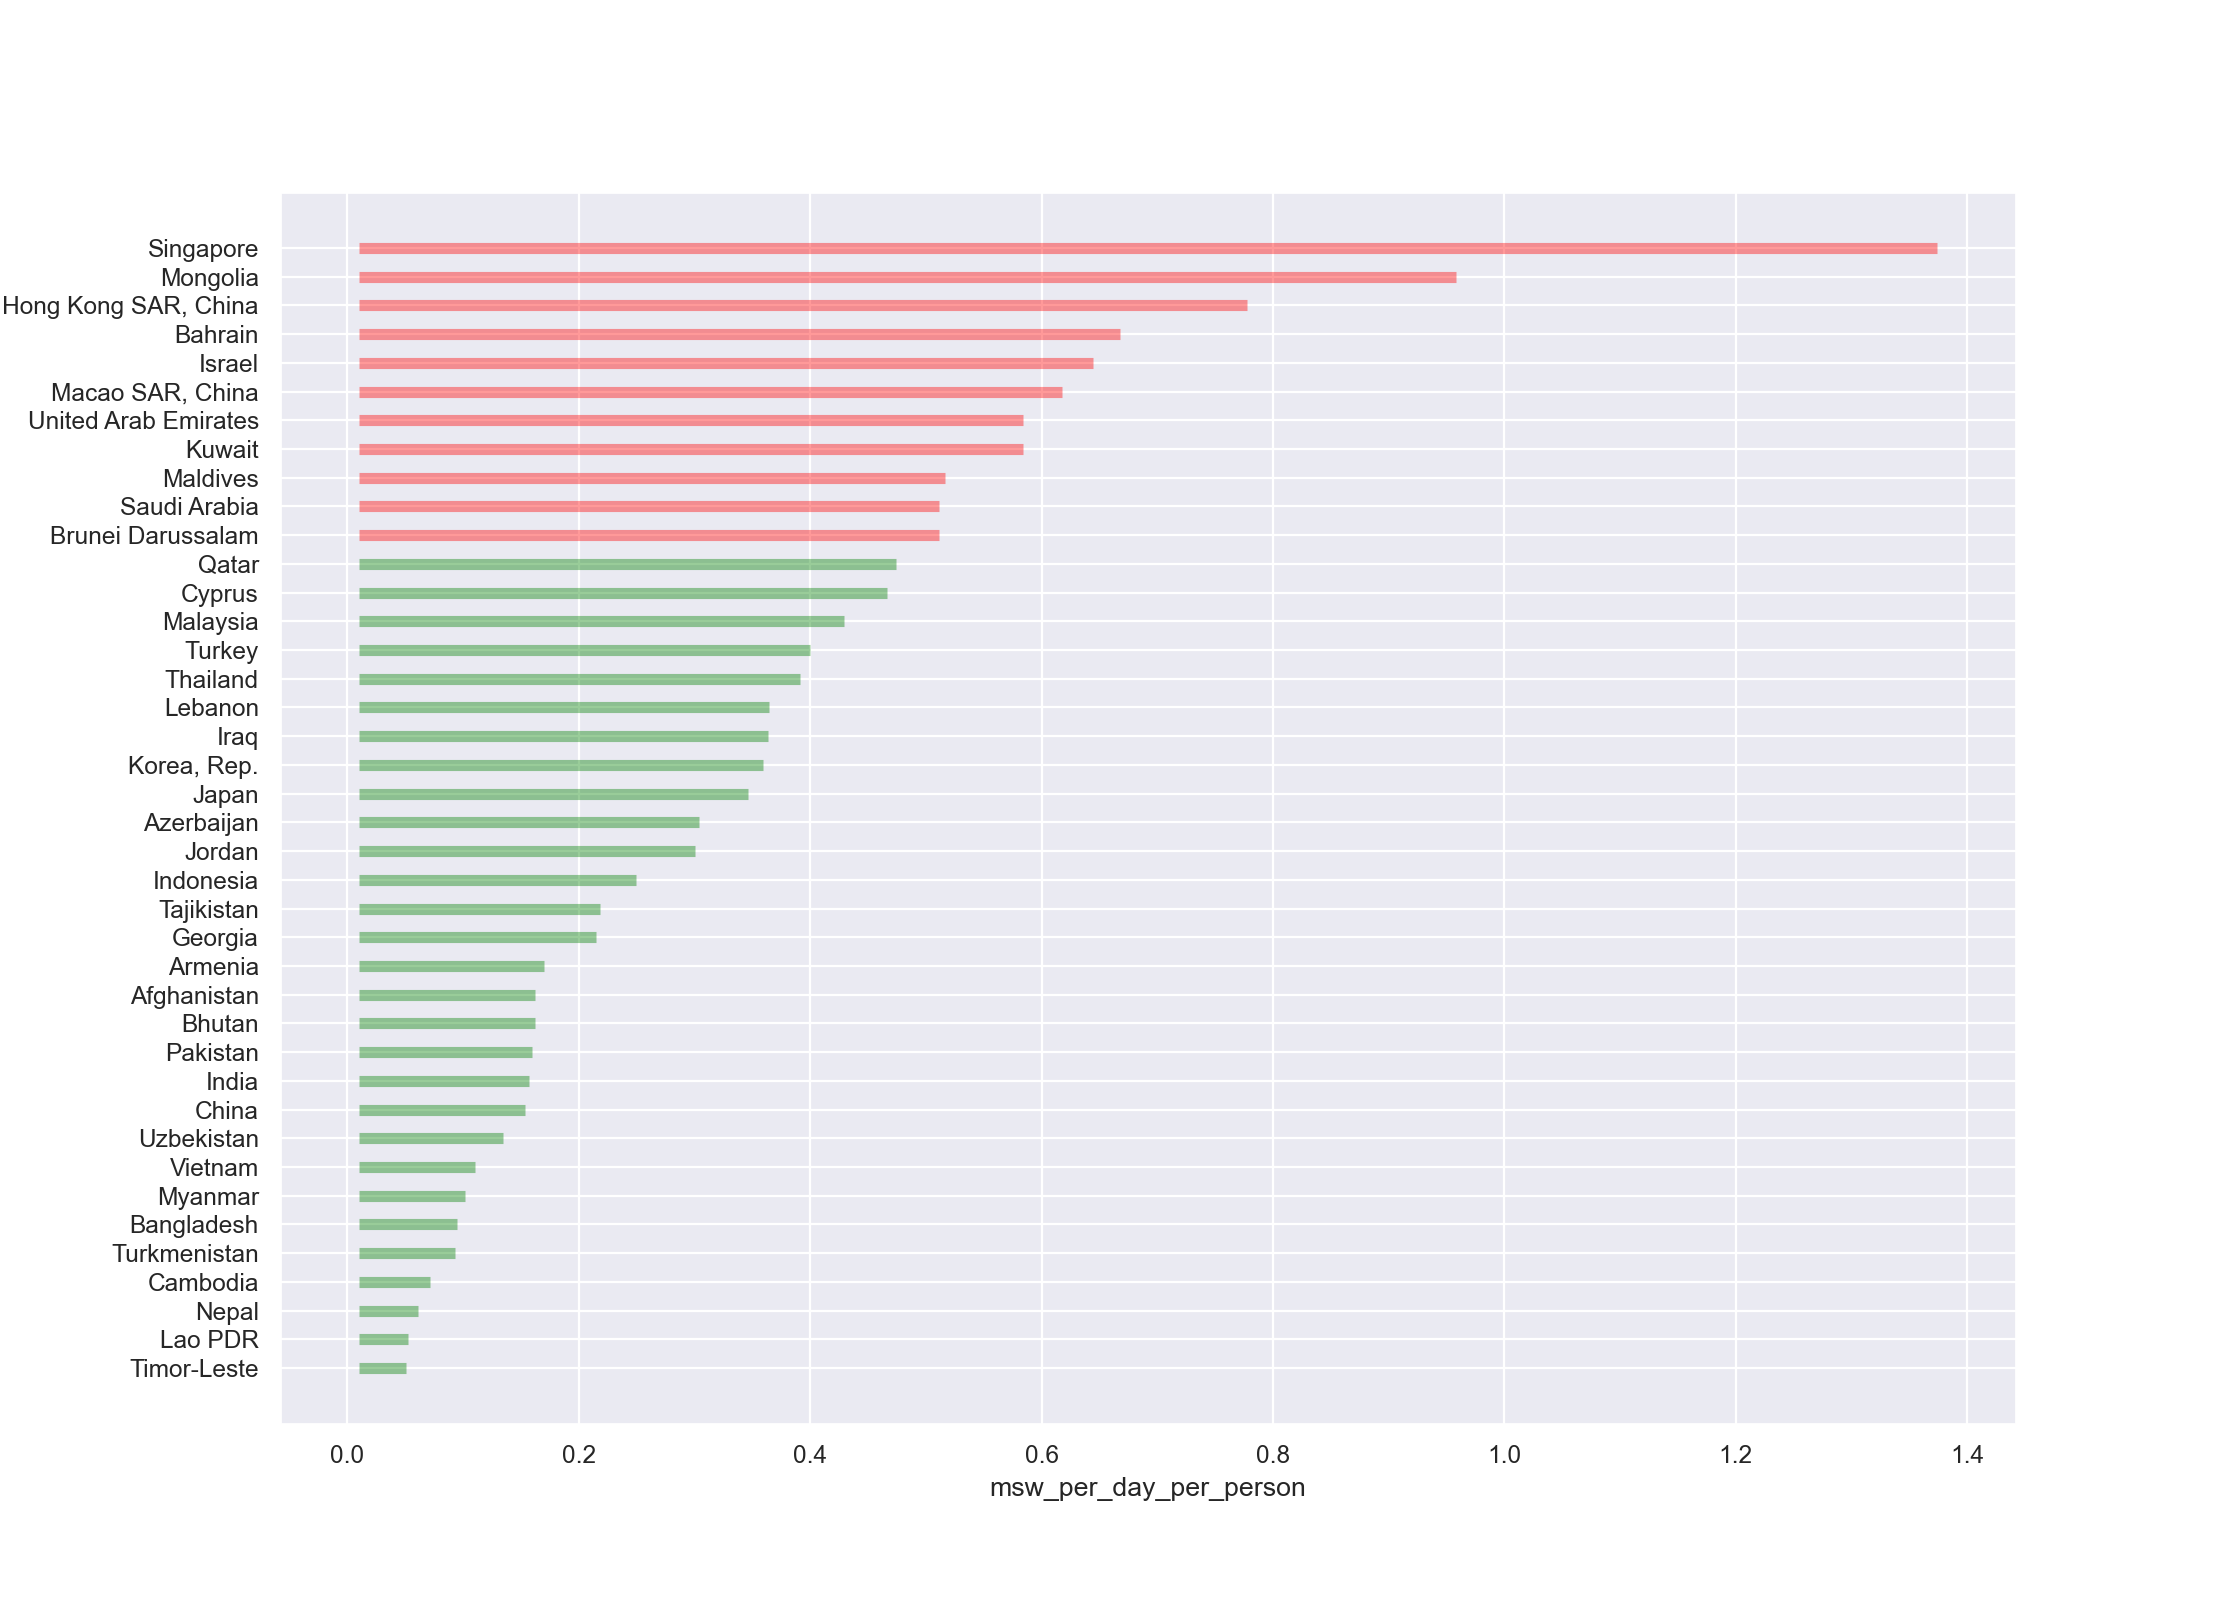

AttributeError: 'DataFrame' object has no attribute 'country_name'

In [6]:
#x = df_Africa.loc[:, ['msw_per_day_per_person']]
#df_Africa['mpg_z'] = (x - x.mean())/x.std()
#df_Africa['colors'] = ['green' if x < 0.5 else 'red' for x in df_Africa['mpg_z']]
#df_Africa.sort_values('mpg_z', inplace=True)
#Total_MSW.reset_index(inplace=True)


x = df_Asia.loc[:, ['msw_per_day_per_person']]
df_Asia['colors'] = ['green' if x < 0.5 else 'red' for x in df_Asia['msw_per_day_per_person']]
df_Asia.sort_values('msw_per_day_per_person', inplace=True)
Total_MSW.reset_index(inplace=True)


# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df_Asia.index, xmin=0.01, xmax=df_Asia.msw_per_day_per_person, color=df_Asia.colors, alpha=0.4, linewidth=5)




#Decorations
plt.gca().set(ylabel='country_name', xlabel='msw_per_day_per_person')
plt.yticks(df_Asia.country_name, fontsize=12)
plt.title('Waste/person/day in Asia', fontdict={'size':10})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


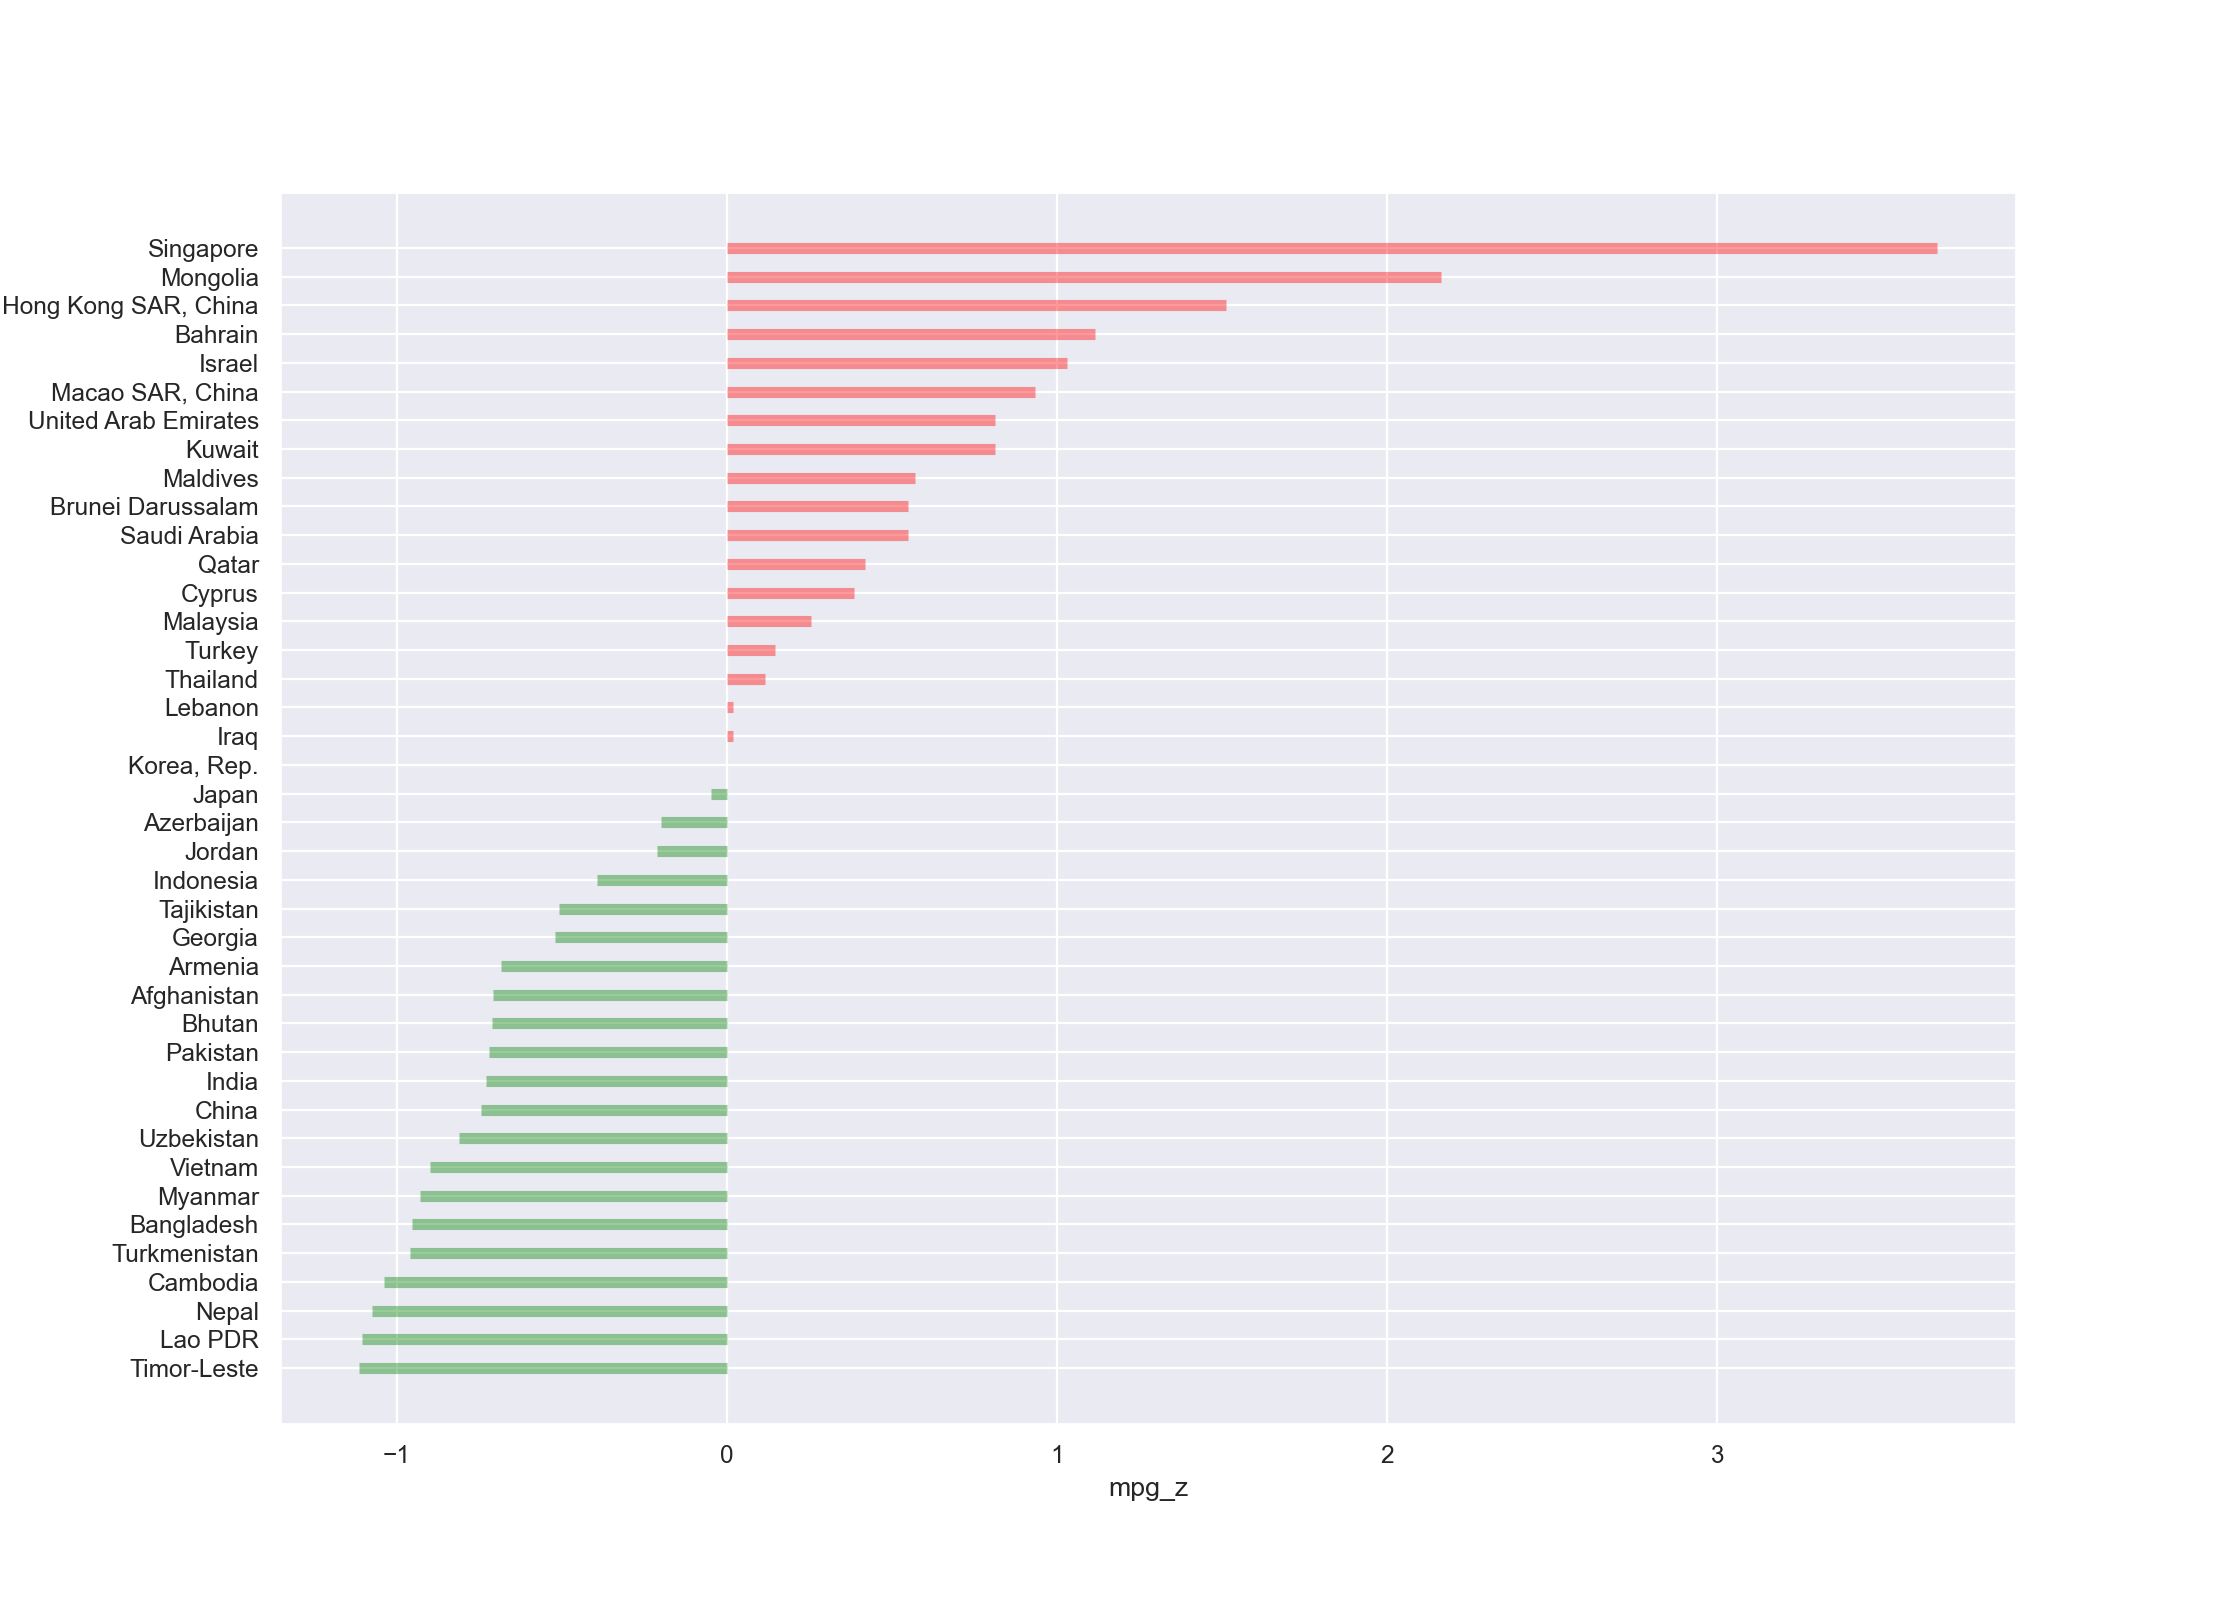

AttributeError: 'DataFrame' object has no attribute 'country_name'

In [7]:
x = df_Asia.loc[:, ['msw_per_day_per_person']]
df_Asia['mpg_z'] = (x - x.mean())/x.std()
df_Asia['colors'] = ['green' if x < 0 else 'red' for x in df_Asia['mpg_z']]
df_Asia.sort_values('mpg_z', inplace=True)
#Total_MSW.reset_index(inplace=True)


#x = df_Africa.loc[:, ['msw_per_day_per_person']]
#df_Africa['colors'] = ['green' if x < 0.5 else 'red' for x in df_Africa['msw_per_day_per_person']]
#df_Africa.sort_values('msw_per_day_per_person', inplace=True)
#Total_MSW.reset_index(inplace=True)


# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df_Asia.index, xmin=0, xmax=df_Asia.mpg_z, color=df_Asia.colors, alpha=0.4, linewidth=5)




#Decorations
plt.gca().set(ylabel='country_name', xlabel='mpg_z')
plt.yticks(df_Asia.country_name, fontsize=12)
plt.title('Waste/person/day in Asia', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


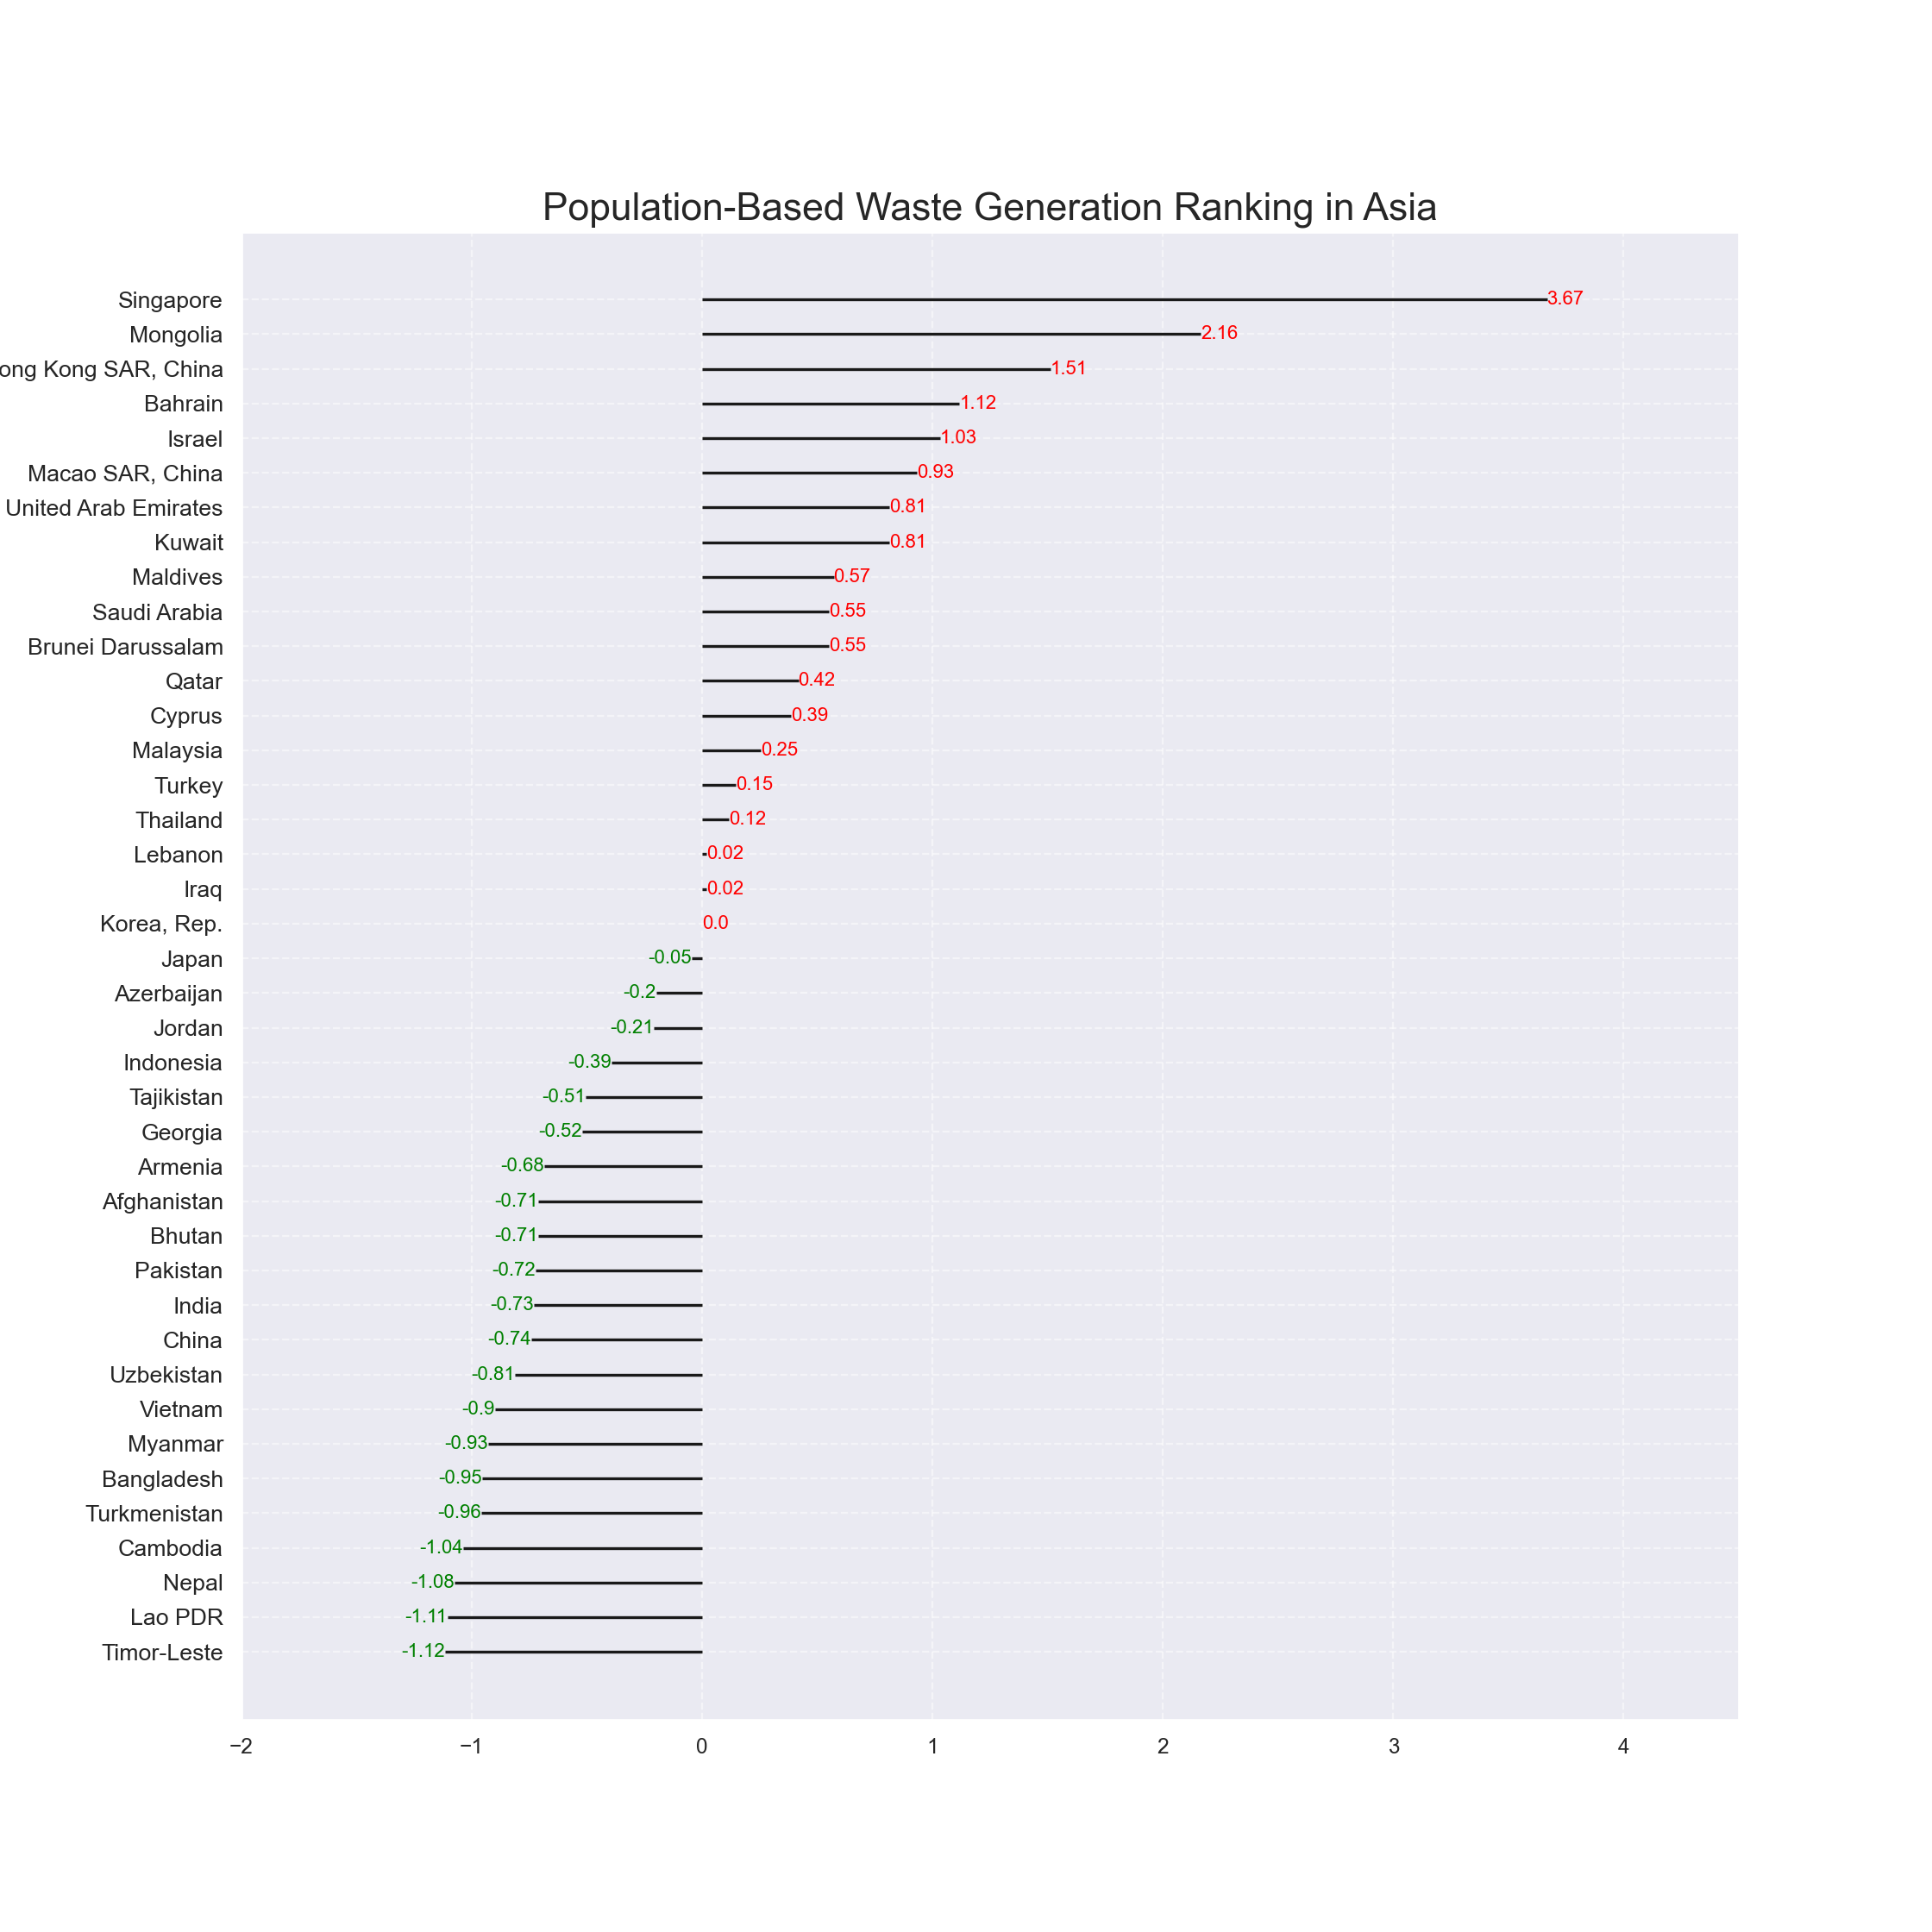

In [8]:
x = df_Asia.loc[:, ['msw_per_day_per_person']]
df_Asia['mpg_z'] = (x - x.mean())/x.std()
df_Asia['colors'] = ['green' if x < 0 else 'red' for x in df_Asia['mpg_z']]
df_Asia.sort_values('mpg_z', inplace=True)
df_Asia.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df_Asia.country_name, xmin=0, xmax=df_Asia.mpg_z)
for x, y, tex in zip(df_Asia.mpg_z, df_Asia.index, df_Asia.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'green' if x < 0 else 'red', 'size':10})
    

# Decorations    
plt.yticks(df_Asia.country_name, fontsize=12)
plt.title('Population-Based Waste Generation Ranking in Asia', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.0, 4.5)
plt.show()

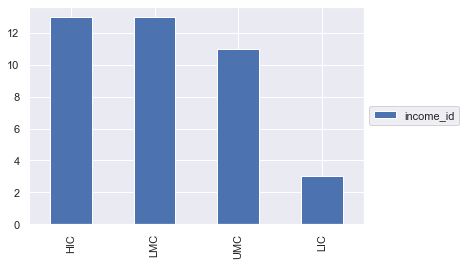

<Figure size 432x288 with 0 Axes>

In [62]:

# Income_Asia = df_Asia.groupby('income_id').income_id.value_counts()
# df_Income_Asia = Income_Asia
Income_Asia = df_Asia.income_id.value_counts()

Income_Asia.plot.bar(legend=True, stacked=False);
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.tight_layout()

/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/shilpa/opt/anaconda3/lib/python3.8/site-packages/pan

<Figure size 800x400 with 0 Axes>

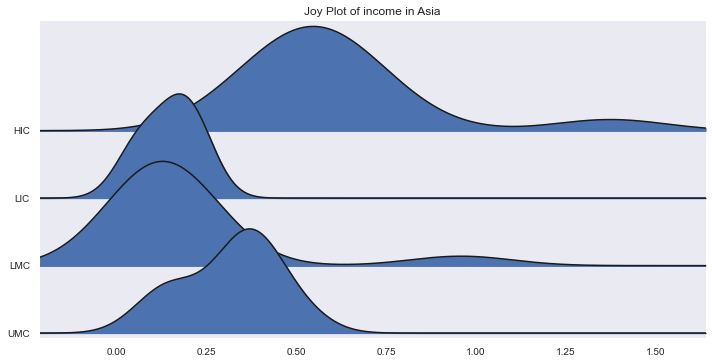

In [60]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline


# !pip install joypy
# Import Data



# Draw Plot
plt.figure(figsize=(10, 5), dpi= 80)
fig, axes = joypy.joyplot(df_Asia, column=['msw_per_day_per_person'], by="income_id", ylim='own', figsize=(10,5))

# # Decoration
plt.title('Joy Plot of income in Asia', fontsize=12)
#plt.xlim(-2.0, 4.5)
plt.show()

In [99]:
MSW_HIC = Total_MSW.groupby('income_id').get_group('HIC')
MSW_HIC.head(5)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person
0,Aruba,HIC,NaN,103187.0,8.813202e+04,241.457580,0.854100
4,Andorra,HIC,3.319880e+09,82431.0,4.300000e+04,117.808219,0.521648
5,United Arab Emirates,HIC,3.842225e+11,9269612.0,5.413453e+06,14831.379200,0.584000
6,Argentina,HIC,4.475178e+11,42981515.0,1.791055e+07,49070.000000,0.416704
9,Antigua and Barbuda,HIC,1.344374e+09,96777.0,3.058500e+04,83.794521,0.316036


In [125]:
MSW_HIC['default_rank'] = MSW_HIC['msw_per_day_per_person'].rank(ascending = True)
MSW_HIC.head

#MSW_HIC.sort_values(by='msw_per_day_per_person', ascending=False)

<ipython-input-125-0feacbf91dbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  MSW_HIC['default_rank'] = MSW_HIC['msw_per_day_per_person'].rank(ascending = True)


,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank,mpg_z
0,Aruba,HIC,NaN,103187.0,8.813202e+04,241.457580,0.854100,66.0,0.829259
4,Andorra,HIC,3.319880e+09,82431.0,4.300000e+04,117.808219,0.521648,39.0,-0.334354
5,United Arab Emirates,HIC,3.842225e+11,9269612.0,5.413453e+06,14831.379200,0.584000,47.0,-0.116117
6,Argentina,HIC,4.475178e+11,42981515.0,1.791055e+07,49070.000000,0.416704,16.0,-0.701671
9,Antigua and Barbuda,HIC,1.344374e+09,96777.0,3.058500e+04,83.794521,0.316036,4.0,-1.054017
10,Australia,HIC,1.349305e+12,23789338.0,1.334500e+07,36561.643836,0.560966,45.0,-0.196740
11,Austria,HIC,4.200405e+11,8633169.0,4.836000e+06,13249.315068,0.560165,44.0,-0.199542
14,Belgium,HIC,5.151026e+11,11274196.0,4.708000e+06,12898.630137,0.417591,17.0,-0.698565
19,Bahrain,HIC,3.176906e+10,1425171.0,9.519430e+05,2608.062930,0.667950,58.0,0.177716
20,"Bahamas, The",HIC,1.034380e+10,386838.0,2.640000e+05,723.287671,0.682456,59.0,0.228489


In [126]:
Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person'].rank(ascending = True)
Total_MSW

<ipython-input-126-f24a0b826c43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person'].rank(ascending = True)


,level_0,index,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank,mpg_z,colors
0,0,114,Lesotho,LMC,2.980617e+09,1965662.0,7.345700e+04,201.252055,0.037370,1.0,-1.230388,red
1,1,192,Timor-Leste,LMC,3.765075e+09,1268671.0,6.387500e+04,175.000000,0.050348,2.0,-1.183494,red
2,2,107,Lao PDR,LMC,1.110215e+10,6663967.0,3.519000e+05,964.109589,0.052806,3.0,-1.174611,red
3,3,146,Nepal,LIC,1.985663e+10,28982771.0,1.768977e+06,4846.513671,0.061035,4.0,-1.144875,red
4,4,61,Ethiopia,LIC,5.234723e+10,99873033.0,6.532787e+06,17898.046493,0.065411,5.0,-1.129065,red
5,5,102,Cambodia,LMC,1.700939e+10,15270790.0,1.089000e+06,2983.561644,0.071313,6.0,-1.107740,red
6,6,167,Sudan,LMC,7.614948e+10,38647803.0,2.831291e+06,7756.961644,0.073259,7.0,-1.100707,red
7,7,72,Guinea,LIC,9.667718e+09,8132552.0,5.969110e+05,1635.372603,0.073398,8.0,-1.100205,red
8,8,137,Malawi,LIC,8.710224e+09,16577147.0,1.297844e+06,3555.738301,0.078291,9.0,-1.082523,red
9,9,134,Mozambique,LIC,1.484607e+10,27212382.0,2.500000e+06,6849.315068,0.091870,10.0,-1.033457,red


<ipython-input-133-ad56b9686964>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  MSW_HIC['mpg_z'] = (x - x.mean())/x.std()
<ipython-input-133-ad56b9686964>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  MSW_HIC['colors'] = ['red' if x < 0 else 'green' for x in MSW_HIC['mpg_z']]
<ipython-input-133-ad56b9686964>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  MSW_HIC.sort

<IPython.core.display.Javascript object>


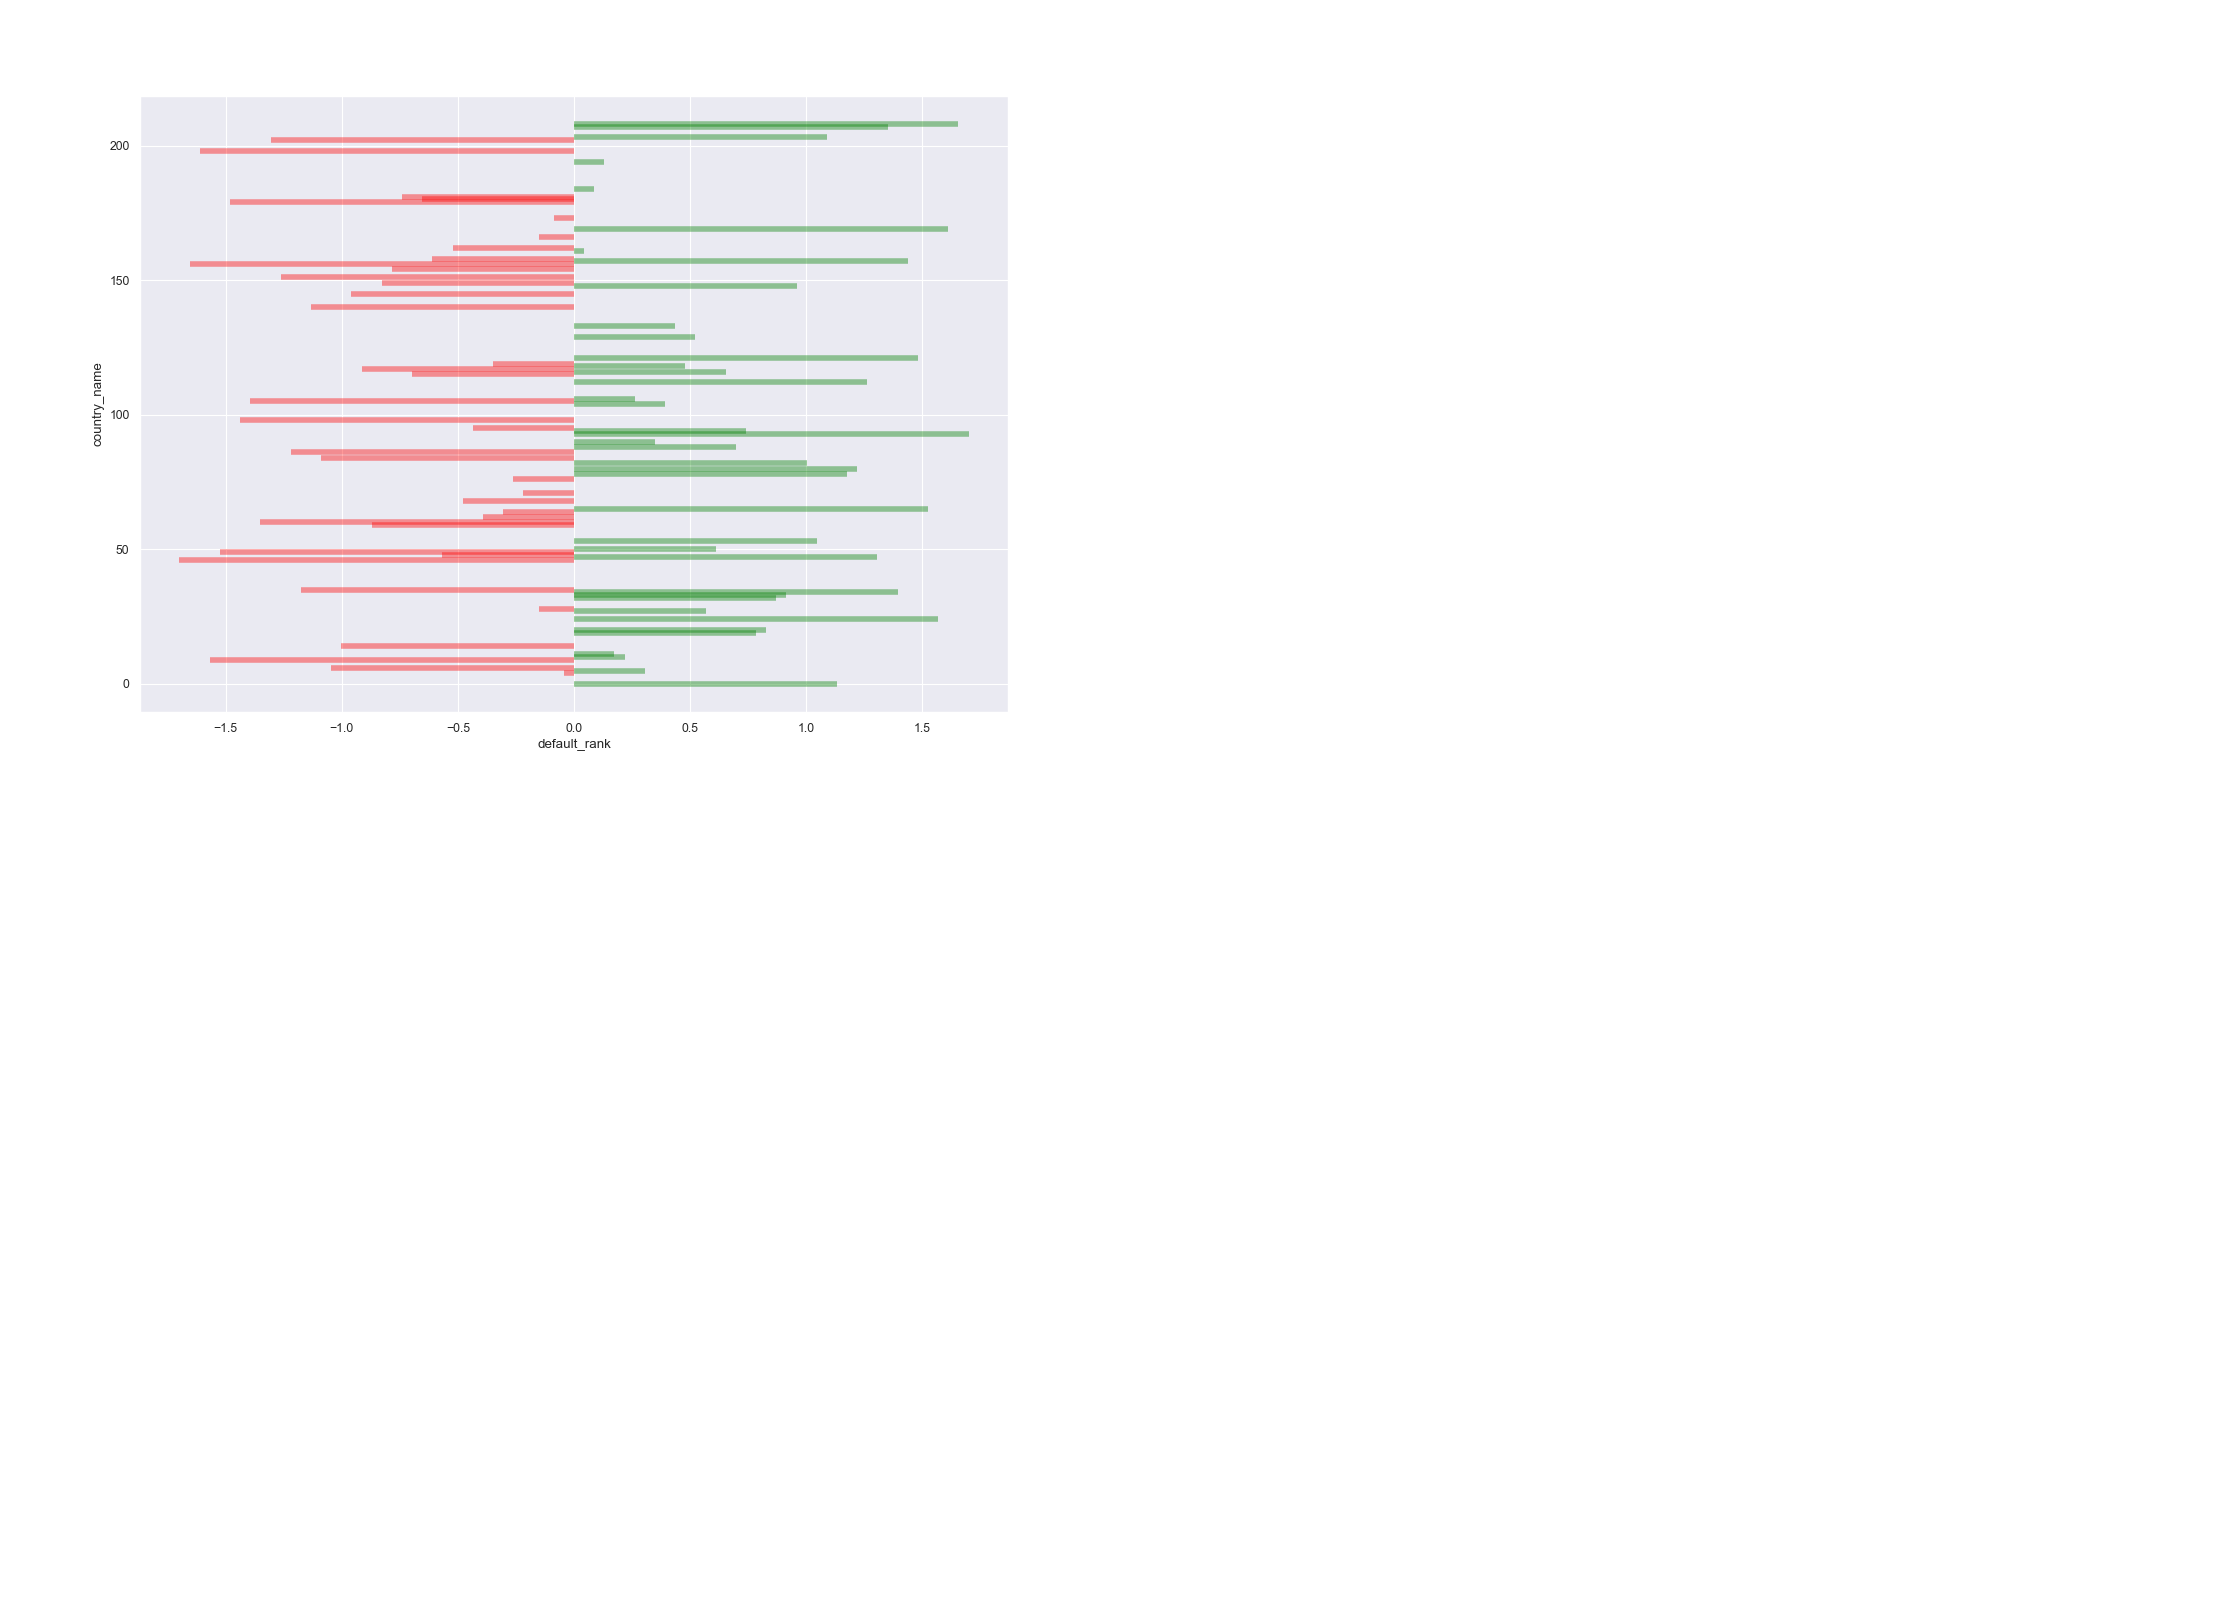

ConversionError: Failed to convert value(s) to axis units: 46                       Curacao
156                       Poland
198                          NaN
9            Antigua and Barbuda
49                Czech Republic
179              Slovak Republic
98                         Japan
105                  Korea, Rep.
60                       Estonia
202                      Uruguay
151                       Panama
86                       Hungary
35                         Chile
140                New Caledonia
84                       Croatia
6                      Argentina
14                       Belgium
145                       Norway
117                       Latvia
59                         Spain
149                         Oman
154                        Palau
181                       Sweden
115                    Lithuania
180                     Slovenia
158                     Portugal
48                        Cyprus
162                        Qatar
68                United Kingdom
95                         Italy
                 ...            
129                        Malta
27                      Barbados
50                       Germany
116                   Luxembourg
88                   Isle of Man
94                        Israel
19                       Bahrain
20                  Bahamas, The
32                        Canada
33                   Switzerland
148                  New Zealand
82          Hong Kong SAR, China
53                       Denmark
203                United States
0                          Aruba
78                     Greenland
80                          Guam
112                Liechtenstein
47                Cayman Islands
207       British Virgin Islands
34               Channel Islands
157                  Puerto Rico
121                       Monaco
65                Faeroe Islands
24                       Bermuda
169                    Singapore
208        Virgin Islands (U.S.)
93                       Iceland
183    Sint Maarten (Dutch part)
186     Turks and Caicos Islands
Name: country_name, Length: 81, dtype: object

In [133]:

x = MSW_HIC.loc[:, ['default_rank']]
MSW_HIC['mpg_z'] = (x - x.mean())/x.std()
MSW_HIC['colors'] = ['red' if x < 0 else 'green' for x in MSW_HIC['mpg_z']]
MSW_HIC.sort_values('mpg_z', inplace=True)
#Total_MSW.reset_index(inplace=True)



# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=MSW_HIC.index, xmin=0, xmax=MSW_HIC.mpg_z, color=MSW_HIC.colors, alpha=0.4, linewidth=5)




#Decorations
plt.gca().set(ylabel='country_name', xlabel='default_rank')
plt.yticks(MSW_HIC.country_name, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()
#plt.tight_layout()

